<a href="https://colab.research.google.com/github/YuliaCherniakova/DA-visualization-statistical_search/blob/main/statistical_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

%matplotlib inline 

drive.mount('/content/drive')
df = pd.read_csv('sample_data/ad.csv')
df.head()

Mounted at /content/drive


,ad_id,action
0,B,0
1,A,0
2,B,1
3,B,1
4,A,1


In [ ]:
df = pd.read_csv('/content/sample_data/ad.csv', sep=',')
df.groupby(by=['ad_id']).describe()

action                                             
        count      mean       std  min  25%  50%  75%  max
ad_id                                                     
A       990.0  0.374747  0.484302  0.0  0.0  0.0  1.0  1.0
B      1010.0  0.404950  0.491126  0.0  0.0  0.0  1.0  1.0

In [ ]:
df1 = df[df.ad_id=='A'].action.values
df1

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
df2=df[df.ad_id=='B'].action.values

In [ ]:
df1m = df1.mean()
df2m = df2.mean()
print(df1m,df2m)

0.3747474747474748 0.404950495049505


In [ ]:
df1d = df1.var(ddof=1)
df2d = df2.var(ddof=1)
print(df1d,df2d)

0.23454872281970354 0.24120440785406588


In [ ]:
d = {'A': 0, 'B': 1}
f = lambda x: d.get(x,x)
df['new_ad_id']=df.ad_id.map(f)
df

,ad_id,action,new_ad_id
0,B,0,1
1,A,0,0
2,B,1,1
3,B,1,1
4,A,1,0
...,...,...,...
1995,A,1,0
1996,A,0,0
1997,A,0,0
1998,B,1,1


In [ ]:
df[['action', 'new_ad_id']].corr()

,action,new_ad_id
action,1.00000,0.03096
new_ad_id,0.03096,1.00000


((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]), array([0, 0, 0, ..., 1, 1, 1])),
 (0.39980546535913436, 0.5050000000000001, 0.7984443064094888))

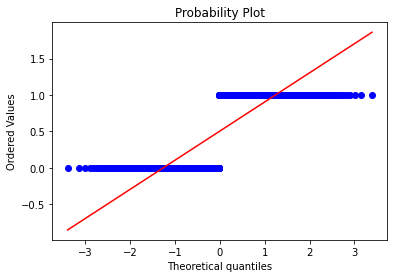

In [ ]:
import scipy.stats as spt
import matplotlib.pyplot as plt
import pylab 
from pandas.plotting import plot_params
spt.probplot(df['new_ad_id'], dist='norm', plot=pylab)